# 다변량 시각화

- 범주형-범주형: 모자이크플롯 (범주 그룹 간 비중의 차이 파악)
- 범주형-연속형: 박스플롯, 평행좌표(데이터의 트렌드, 범주 별 경향성 판단 가능)
- 연속형-연속형: 산점도 (상관도 파악, 선형 비선형 관계 및 음양의 방향 파악)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
housing = pd.read_excel('./boston_housing.xls')
housing_data = housing.copy()

In [10]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [11]:
# MEDV 변수 범주화
medv_bins = [0
            , np.mean(housing_data['MEDV'])
            , np.max(housing_data['MEDV'])]
medv_names = ['cheap', 'expensive']
housing_data['MEDV_G'] = pd.cut(housing_data['MEDV'], bins=medv_bins, labels=medv_names)

# INDUS 변수 범주화
indus_bins = [0
            , np.mean(housing_data['INDUS'])
            , np.max(housing_data['INDUS'])]
indus_names = ['INDUS_LOW', 'INDUS_HIGH']
housing_data['INDUS_G'] = pd.cut(housing_data['INDUS'], bins=indus_bins, labels=indus_names)

# RAD 변수 범주화
rad_bins = [0
            , np.mean(housing_data['RAD'])
            , np.max(housing_data['RAD'])]
rad_names = ['RAD_LOW', 'RAD_HIGH']
housing_data['RAD_G'] = pd.cut(housing_data['RAD'], bins=rad_bins, labels=rad_names)

### 모자이크 플롯

In [12]:
from statsmodels.graphics.mosaicplot import mosaic

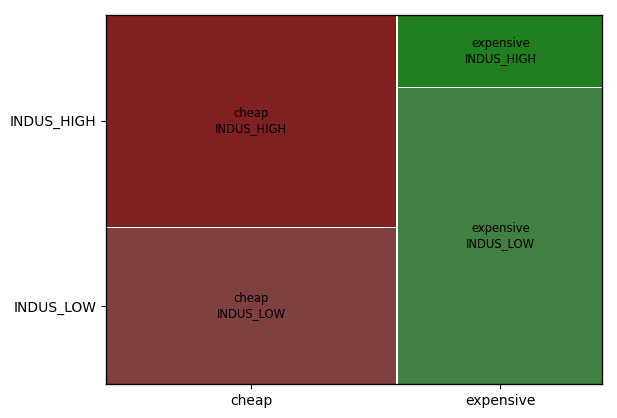

In [13]:
mosaic(housing_data, ['MEDV_G', 'INDUS_G'])
plt.show()

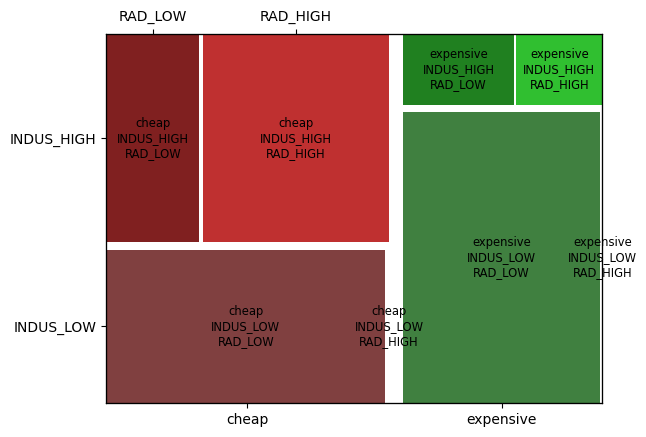

In [15]:
mosaic(housing_data, ['MEDV_G', 'INDUS_G', 'RAD_G'], gap=0.03)
plt.show()

### Box plot

<AxesSubplot: xlabel='MEDV_G', ylabel='RM'>

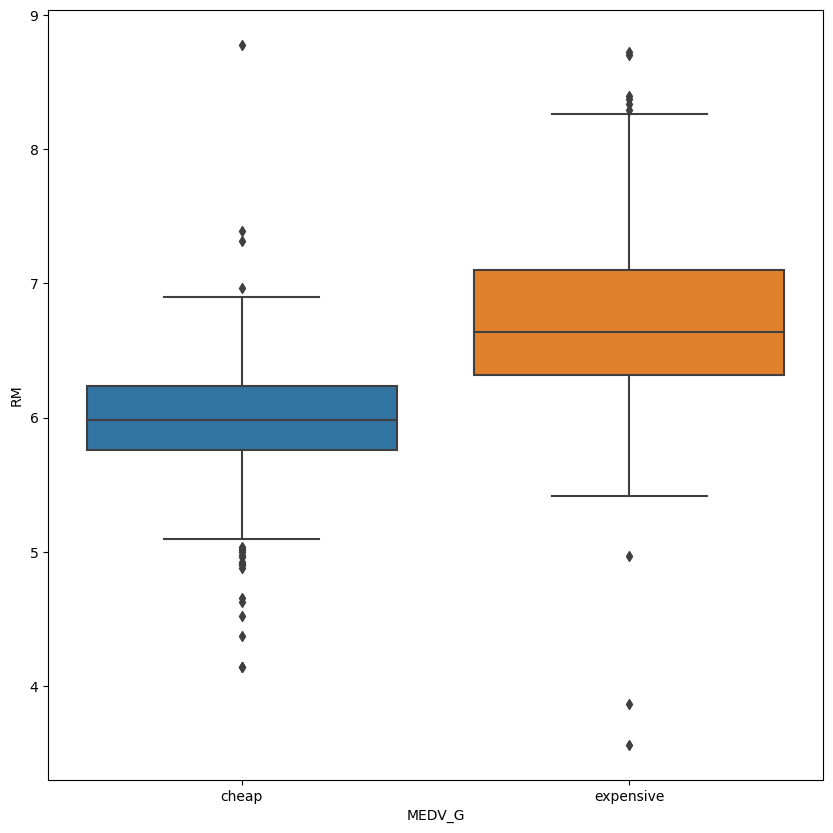

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(data=housing_data, x='MEDV_G', y='RM')

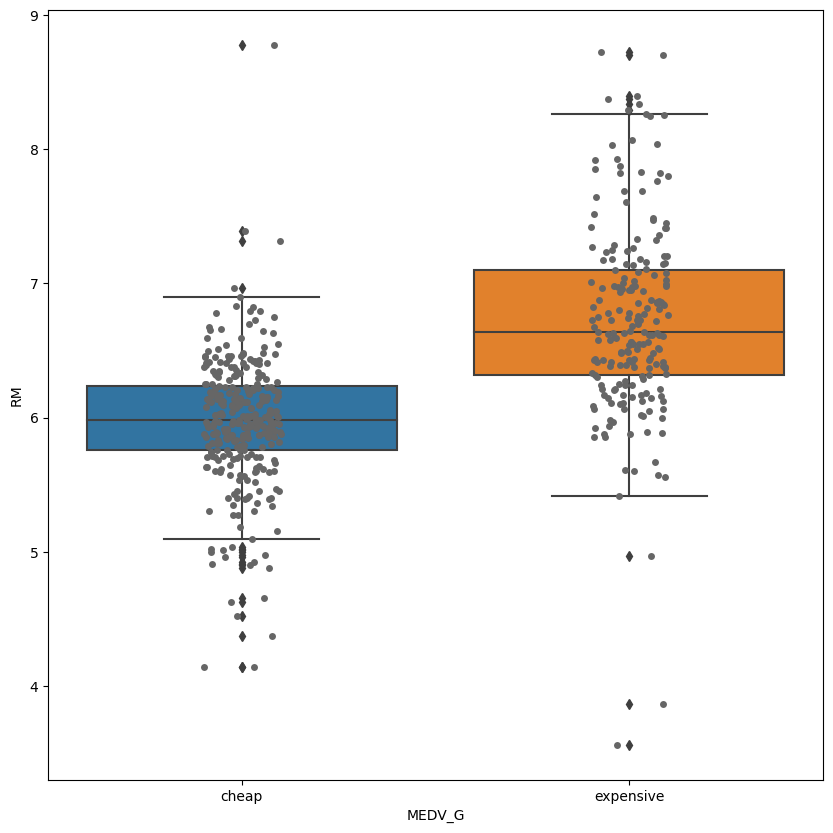

In [20]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='MEDV_G', y='RM', data=housing_data)
sns.stripplot(x='MEDV_G', y='RM', data=housing_data, color="0.4")
plt.show()

### 평행좌표

In [21]:
from pandas.plotting import parallel_coordinates

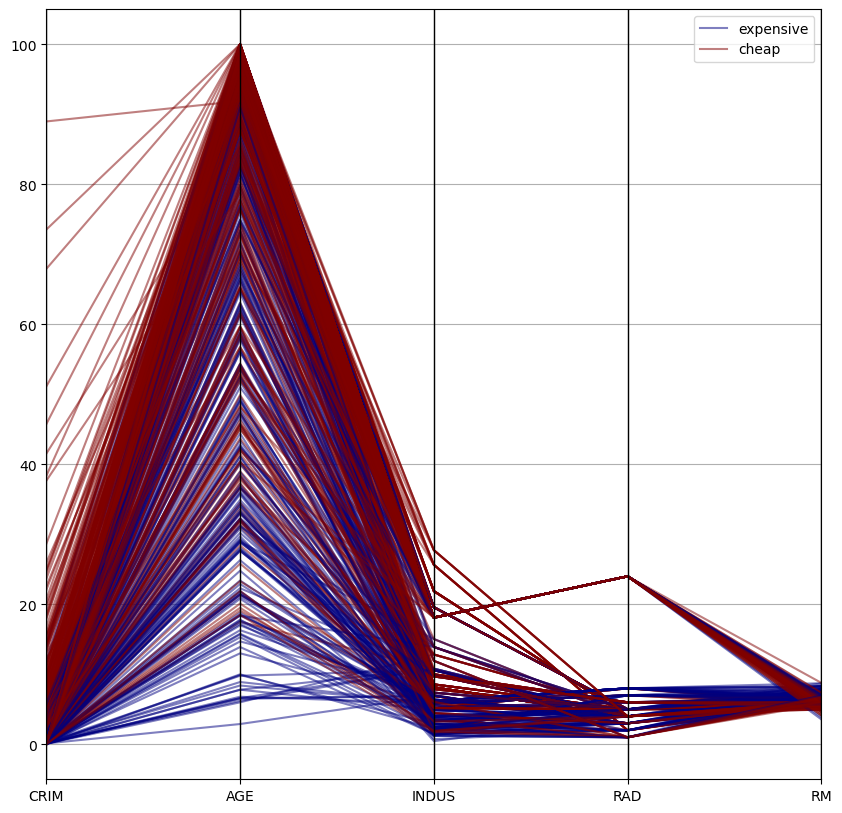

In [24]:
# 데이터 일부 컬럼만 추출
sub_data = housing_data[['CRIM', 'AGE', 'INDUS', 'RAD', 'RM', 'MEDV_G']]

plt.figure(figsize=(10,10))
parallel_coordinates(sub_data, 'MEDV_G', colormap=plt.get_cmap('jet'), alpha=0.5)
plt.show()

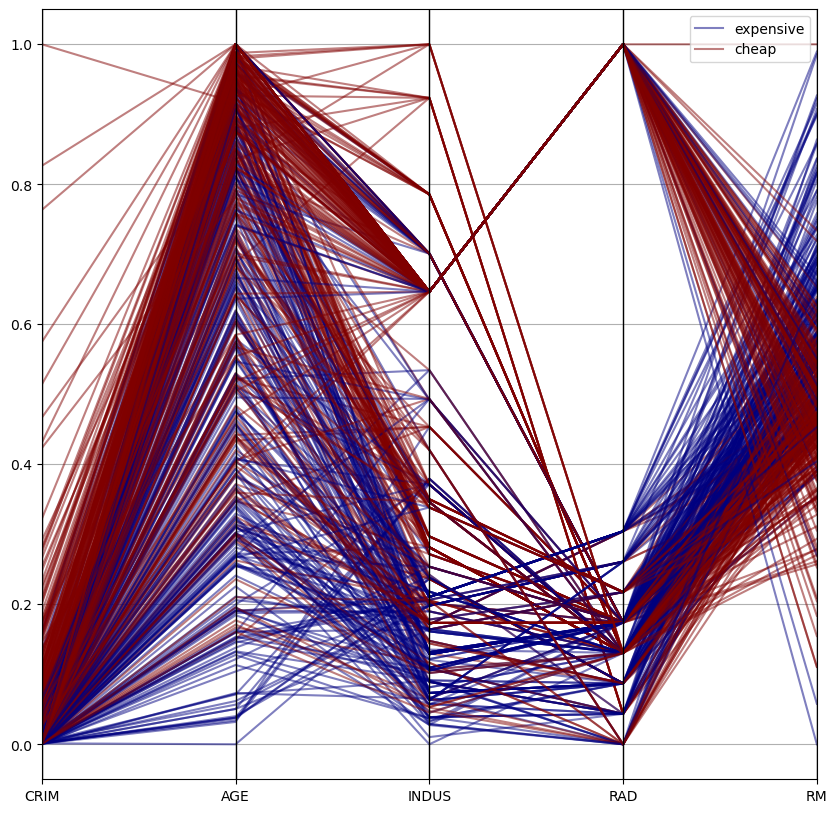

In [27]:
# 데이터 위치를 파악하기 위한 min-max scaling 변환

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = sub_data[['CRIM', 'AGE', 'INDUS', 'RAD', 'RM']]
x_norm = pd.DataFrame(scaler.fit_transform(x_df), columns=['CRIM', 'AGE', 'INDUS', 'RAD', 'RM'])

sub_data_scale = pd.merge(x_norm, sub_data[['MEDV_G']], left_index=True, right_index=True, how='inner')

plt.figure(figsize=(10,10))
parallel_coordinates(sub_data_scale, 'MEDV_G', colormap=plt.get_cmap('jet'), alpha=0.5)
plt.show()

### 산점도

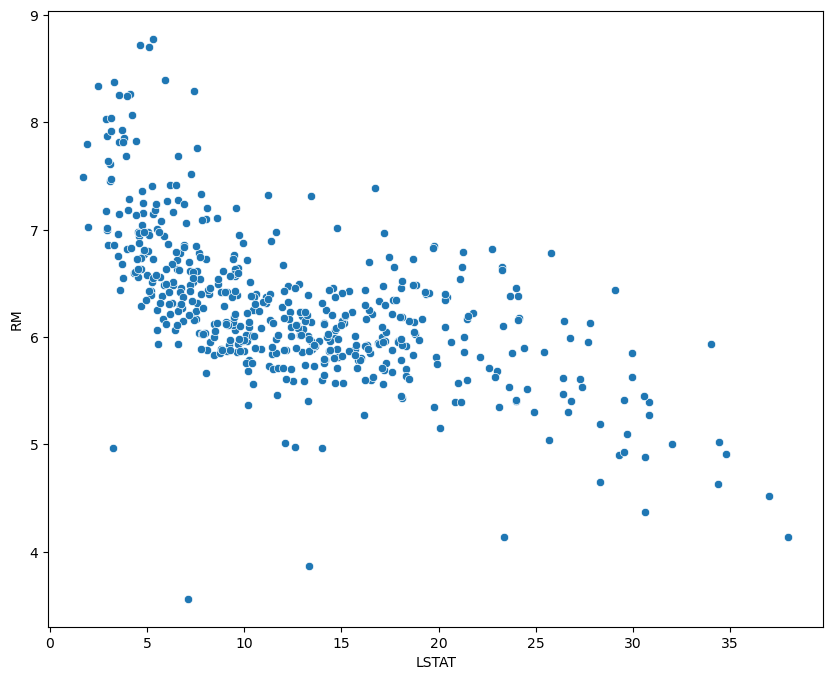

In [28]:
housing_data = housing.copy()
plt.figure(figsize=(10,8))
sns.scatterplot(x='LSTAT', y='RM', data=housing_data)
plt.show()

In [30]:
# 피어슨 상관계수
import scipy.stats as stats
stats.pearsonr(housing_data.LSTAT, housing_data.RM)

PearsonRResult(statistic=-0.6138082718663957, pvalue=1.0330091329655203e-53)

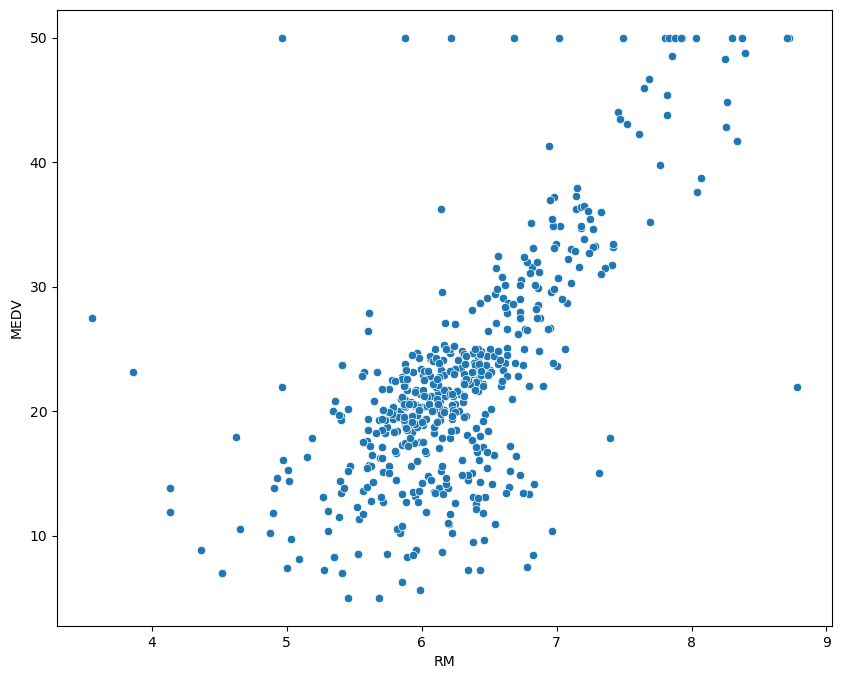

In [31]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='RM', y='MEDV', data=housing_data)
plt.show()

In [32]:
stats.pearsonr(housing_data.MEDV, housing_data.RM)

PearsonRResult(statistic=0.6953599470715393, pvalue=2.487228871007442e-74)

In [33]:
np.round(housing_data.corr(), 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47,-0.27


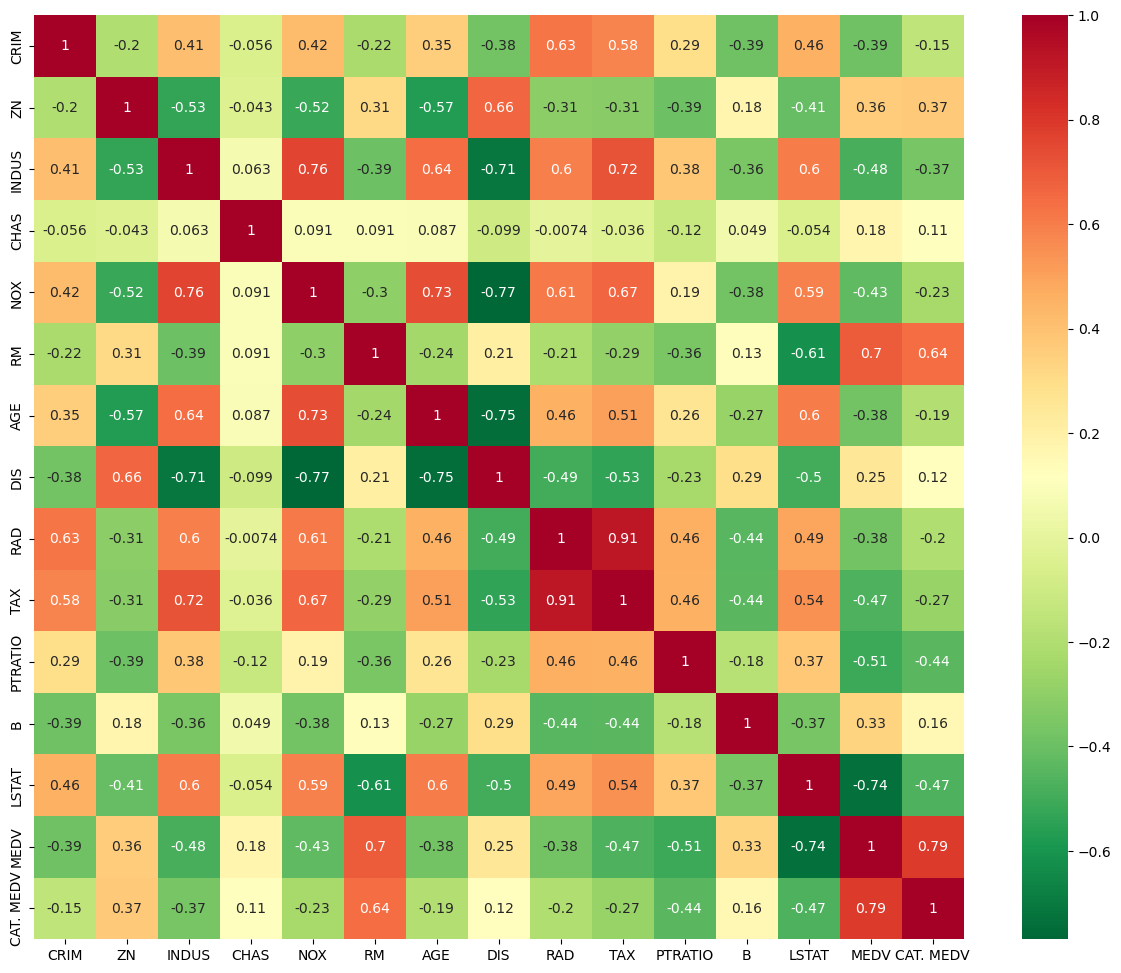

In [34]:
plt.figure(figsize=(15,12))
sns.heatmap(housing_data.corr(), annot=True, cmap='RdYlGn_r')
plt.show()